In [81]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from api_key import g_map_key
import gmaps

# Import csv files for all GA State cancer files

csv_kidney = "GeorgiaData_Kidney.csv"
kidney_df = pd.read_csv(csv_kidney)

csv_leukemia = "GeorgiaData_Leukemia.csv"
leukimia_df = pd.read_csv(csv_leukemia)

csv_liver = "GeorgiaData_Liver.csv"
liver_df = pd.read_csv(csv_liver)

csv_lung = "GeorgiaData_Lung & Bronchus.csv"
lung_df = pd.read_csv(csv_lung)

csv_nonhodgkin = "GeorgiaData_NonHodgkinLymphoma.csv"
nonhodgkin_df = pd.read_csv(csv_nonhodgkin)

In [82]:
# Append dataframe and merge all dataframes

ga_cancer_df = leukimia_df.append(kidney_df)
ga_cancer_df = liver_df.append(ga_cancer_df)
ga_cancer_df = lung_df.append(ga_cancer_df)
ga_cancer_df = nonhodgkin_df.append(ga_cancer_df)
ga_cancer_df

,County,FIPS,"Age-Adjusted Incidence Rate(â€ ) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (â€¡) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,CancerType,"Age-Adjusted Incidence Rate(†) - cases per 100,000",Recent 5-Year Trend (‡) in Incidence Rates,"Age-Adjusted Incidence Rate - cases per 100,000"
0,Georgia,13000,18.2,17.8,18.6,1911.00,stable,0.3,-0.1,0.7,Non-Hodgkin Lymphoma,NaN,NaN,NaN
1,US,0,19.3,19.2,19.3,70661.00,falling,-1.5,-2.3,-0.6,Non-Hodgkin Lymphoma,NaN,NaN,NaN
2,Gilmer,13123,29.3,22.1,38.2,13.00,rising,15.6,4.4,28,Non-Hodgkin Lymphoma,NaN,NaN,NaN
3,Towns,13281,29.2,15.6,49.9,5.00,*,*,*,*,Non-Hodgkin Lymphoma,NaN,NaN,NaN
4,Pickens,13227,27.4,20.4,36.1,12.00,stable,2.4,-1.7,6.6,Non-Hodgkin Lymphoma,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Webster,13307,NaN,*,*,3 or fewer,*,*,*,*,Kidney,NaN,NaN,*
157,Wheeler,13309,NaN,*,*,3 or fewer,*,*,*,*,Kidney,NaN,NaN,*
158,Wilcox,13315,NaN,*,*,3 or fewer,*,*,*,*,Kidney,NaN,NaN,*
159,Wilkes,13317,NaN,*,*,3 or fewer,*,*,*,*,Kidney,NaN,NaN,*


In [83]:
# Remove value of '3 or fewer in column 'Average Annual Count'

ga_cancer_clean = ga_cancer_df.drop(ga_cancer_df.loc[ga_cancer_df['Average Annual Count']=="3 or fewer"].index)
ga_cancer_clean

,County,FIPS,"Age-Adjusted Incidence Rate(â€ ) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (â€¡) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,CancerType,"Age-Adjusted Incidence Rate(†) - cases per 100,000",Recent 5-Year Trend (‡) in Incidence Rates,"Age-Adjusted Incidence Rate - cases per 100,000"
0,Georgia,13000,18.2,17.8,18.6,1911.00,stable,0.3,-0.1,0.7,Non-Hodgkin Lymphoma,NaN,NaN,NaN
1,US,0,19.3,19.2,19.3,70661.00,falling,-1.5,-2.3,-0.6,Non-Hodgkin Lymphoma,NaN,NaN,NaN
2,Gilmer,13123,29.3,22.1,38.2,13.00,rising,15.6,4.4,28,Non-Hodgkin Lymphoma,NaN,NaN,NaN
3,Towns,13281,29.2,15.6,49.9,5.00,*,*,*,*,Non-Hodgkin Lymphoma,NaN,NaN,NaN
4,Pickens,13227,27.4,20.4,36.1,12.00,stable,2.4,-1.7,6.6,Non-Hodgkin Lymphoma,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Spalding,13255,NaN,13.3,22.3,13.00,stable,3.6,-0.3,7.7,Kidney,NaN,NaN,17.3
59,Camden,13039,NaN,12.3,23.8,8.00,stable,2.5,-2.9,8.2,Kidney,NaN,NaN,17.3
60,Dougherty,13095,NaN,13.8,21.5,18.00,stable,1.3,-1.1,3.7,Kidney,NaN,NaN,17.3
61,Colquitt,13071,NaN,12.5,23.3,9.00,rising,3.5,0.1,7,Kidney,NaN,NaN,17.3


In [84]:
# Remove values 
ga_cancer_clean1 = ga_cancer_clean.drop(columns=['Age-Adjusted Incidence Rate(†) - cases per 100,000', 
                                                'Recent 5-Year Trend (‡) in Incidence Rates',
                                                'Age-Adjusted Incidence Rate - cases per 100,000'],axis=1)
ga_cancer_clean1

# Remove rows of 'Georgia' & 'US' under County column

ga_cancer_clean2 = ga_cancer_clean1.drop(ga_cancer_clean1[ga_cancer_clean1.County.isin(["Georgia", "US"])].index)
ga_cancer_clean2.reset_index()
ga_cancer_clean2

,County,FIPS,"Age-Adjusted Incidence Rate(â€ ) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (â€¡) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,CancerType
2,Gilmer,13123,29.3,22.1,38.2,13.00,rising,15.6,4.4,28,Non-Hodgkin Lymphoma
3,Towns,13281,29.2,15.6,49.9,5.00,*,*,*,*,Non-Hodgkin Lymphoma
4,Pickens,13227,27.4,20.4,36.1,12.00,stable,2.4,-1.7,6.6,Non-Hodgkin Lymphoma
5,Union,13291,26,18.5,36.2,11.00,stable,0.8,-3.2,5.1,Non-Hodgkin Lymphoma
6,Lumpkin,13187,25.8,18.8,34.7,10.00,stable,4.2,-0.4,9,Non-Hodgkin Lymphoma
...,...,...,...,...,...,...,...,...,...,...,...
58,Spalding,13255,NaN,13.3,22.3,13.00,stable,3.6,-0.3,7.7,Kidney
59,Camden,13039,NaN,12.3,23.8,8.00,stable,2.5,-2.9,8.2,Kidney
60,Dougherty,13095,NaN,13.8,21.5,18.00,stable,1.3,-1.1,3.7,Kidney
61,Colquitt,13071,NaN,12.5,23.3,9.00,rising,3.5,0.1,7,Kidney


In [85]:
#ga_cancer_clean.to_numeric(ga_cancer_clean['Average Annual Count'],erros='coerce')

ga_cancer_clean2['Average Annual Count'] = ga_cancer_clean2['Average Annual Count'].astype(float)
print(ga_cancer_clean2.dtypes)

County                                                   object
 FIPS                                                     int64
Age-Adjusted Incidence Rate(â€ ) - cases per 100,000     object
Lower 95% Confidence Interval                            object
Upper 95% Confidence Interval                            object
Average Annual Count                                    float64
Recent Trend                                             object
Recent 5-Year Trend (â€¡) in Incidence Rates             object
Lower 95% Confidence Interval.1                          object
Upper 95% Confidence Interval.1                          object
CancerType                                               object
dtype: object


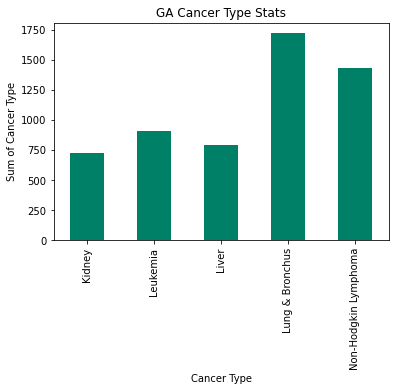

In [86]:
# Create a bar chart for GA stats by Cancer Type

ga_cancer_type = ga_cancer_clean2.groupby('CancerType')

ga_cancer_sum = ga_cancer_type['Average Annual Count'].sum()

ga_cancer_bar = ga_cancer_sum.plot(kind='bar', colormap='summer')

ga_cancer_bar.set_title("GA Cancer Type Stats")
ga_cancer_bar.set_xlabel("Cancer Type")
ga_cancer_bar.set_ylabel("Sum of Cancer Type")

plt.savefig("../GA_Data/fig1")
plt.show()

In [87]:
ga_cancer_type = ga_cancer_clean2.groupby('CancerType')
ga_cancer_type_sum = ga_cancer_type['Average Annual Count'].sum()
ga_cancer_type_sum.head()

CancerType
Kidney                   724.0
Leukemia                 913.0
Liver                    796.0
Lung & Bronchus         1722.0
Non-Hodgkin Lymphoma    1431.0
Name: Average Annual Count, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

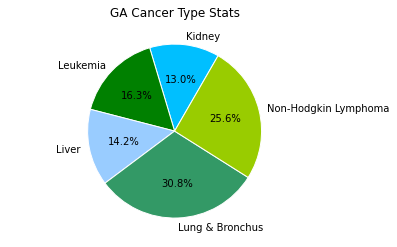

In [143]:
# Create a pie chart to show GA stats by Cancer Type

ga_cancer_type = ga_cancer_clean2.groupby('CancerType')

ga_cancer_sum = ga_cancer_type['Average Annual Count'].sum()

cancer_type = list(ga_cancer_sum.index.values)

plt.title("GA Cancer Type Stats")

plt.axis("equal")

plt.pie(ga_cancer_sum, labels=cancer_type, colors = ['deepskyblue', 'green', '#99CCFF','#339966','#99CC00'], 
        wedgeprops={'edgecolor': 'white'},
        autopct='%1.1f%%', startangle=60)

plt.savefig("../GA_Data/fig2")
plt.show

In [89]:
ga_cancer_clean2

,County,FIPS,"Age-Adjusted Incidence Rate(â€ ) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (â€¡) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,CancerType
2,Gilmer,13123,29.3,22.1,38.2,13.0,rising,15.6,4.4,28,Non-Hodgkin Lymphoma
3,Towns,13281,29.2,15.6,49.9,5.0,*,*,*,*,Non-Hodgkin Lymphoma
4,Pickens,13227,27.4,20.4,36.1,12.0,stable,2.4,-1.7,6.6,Non-Hodgkin Lymphoma
5,Union,13291,26,18.5,36.2,11.0,stable,0.8,-3.2,5.1,Non-Hodgkin Lymphoma
6,Lumpkin,13187,25.8,18.8,34.7,10.0,stable,4.2,-0.4,9,Non-Hodgkin Lymphoma
...,...,...,...,...,...,...,...,...,...,...,...
58,Spalding,13255,NaN,13.3,22.3,13.0,stable,3.6,-0.3,7.7,Kidney
59,Camden,13039,NaN,12.3,23.8,8.0,stable,2.5,-2.9,8.2,Kidney
60,Dougherty,13095,NaN,13.8,21.5,18.0,stable,1.3,-1.1,3.7,Kidney
61,Colquitt,13071,NaN,12.5,23.3,9.0,rising,3.5,0.1,7,Kidney


In [90]:
# Import Georgia Landfill csv file from GitHub

url = "https://raw.githubusercontent.com/LCHoffman/Project_1/Lindsey/Georgia_trash.csv"
ga_landfill_df = pd.read_csv(url, error_bad_lines=False)
ga_landfill_df

,Unnamed: 0,Landfill Name,State,County
0,556,"Advanced Disposal Services Evergreen Landfill,...",GA,Lowndes
1,557,Athens-Clarke County Landfill,GA,Clarke
2,558,Atkinson County - SR 50 MSWL,GA,Atkinson
3,559,Baker Place Road Landfill (Ph 1 & 2),GA,Columbia
4,560,Bartow County MSWLF,GA,Bartow
...,...,...,...,...
61,625,Turkey Run Landfill,GA,Meriwether
62,628,Walker Mountain Landfill,GA,Floyd
63,629,Watts Road LF,GA,Fulton
64,630,"WI Taylor County Disposal, LLC",GA,Taylor


In [91]:
# Merge GA Cancer dataframe and GA Landfill dataframe

ga_data_merged1 = pd.merge(ga_cancer_clean2, ga_landfill_df, how='inner', on='County')
ga_data_merged1

,County,FIPS,"Age-Adjusted Incidence Rate(â€ ) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (â€¡) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,CancerType,Unnamed: 0,Landfill Name,State
0,Newton,13217,22.2,18.3,26.7,24.0,stable,0,-2.6,2.7,Non-Hodgkin Lymphoma,608,Newton County Landfill,GA
1,Newton,13217,NaN,7.3,12.8,11.0,*,NaN,*,*,Liver,608,Newton County Landfill,GA
2,Newton,13217,NaN,16.3,24.6,20.0,stable,NaN,-0.5,7.7,Leukemia,608,Newton County Landfill,GA
3,Newton,13217,NaN,17.6,25.8,23.0,rising,3.3,1.2,5.4,Kidney,608,Newton County Landfill,GA
4,Bartow,13015,21.7,17.8,26.1,23.0,stable,-0.3,-3.3,2.8,Non-Hodgkin Lymphoma,560,Bartow County MSWLF,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Butts,13035,NaN,13.2,30.4,5.0,stable,NaN,-1.6,9.2,Leukemia,613,Pine Ridge Landfill,GA
175,Butts,13035,NaN,13.4,29,6.0,*,*,*,*,Kidney,613,Pine Ridge Landfill,GA
176,Meriwether,13199,NaN,12,28.7,5.0,stable,NaN,-2.1,8.8,Leukemia,625,Turkey Run Landfill,GA
177,Jefferson,13163,NaN,14.4,35.3,5.0,*,*,*,*,Kidney,599,Jefferson County CR-138 MSWL,GA


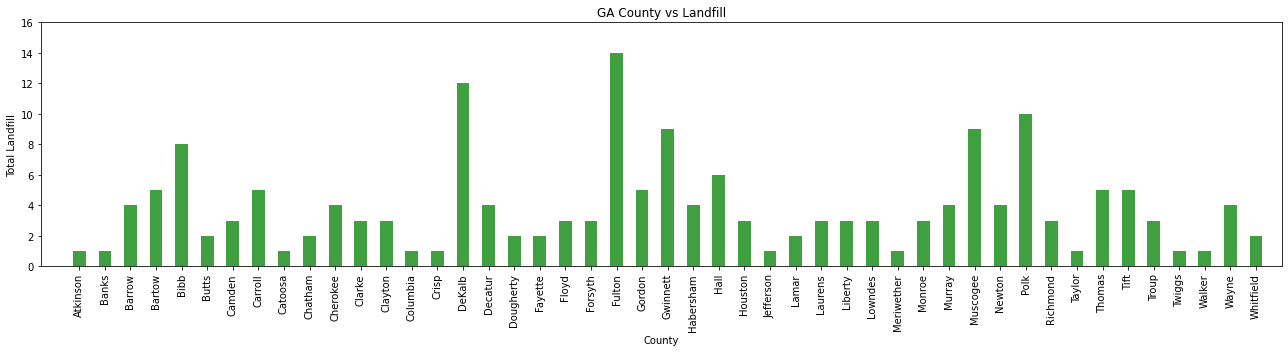

In [124]:
# Create a bar chart for Total number of Landfills for each county

ga_county_data = ga_data_merged1.groupby('County')
ga_landfill_count = ga_county_data['County'].count()

x_axis = np.arange(0, len(ga_county_data))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(18,5))
plt.xlim(-1.5, len(x_axis))
plt.ylim(0, max(ga_landfill_count)+2)

plt.xlabel("County")
plt.ylabel("Total Landfill")

plt.title("GA County vs Landfill")
plt.bar(x_axis, ga_landfill_count, facecolor="green", alpha=0.75, align="center", width=0.5)
plt.xticks(tick_locations, list(ga_landfill_count.index), rotation="vertical")

plt.tight_layout()
plt.savefig('../GA_Data/fig3')
plt.show()

In [93]:
ga_data_merged1

,County,FIPS,"Age-Adjusted Incidence Rate(â€ ) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (â€¡) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,CancerType,Unnamed: 0,Landfill Name,State
0,Newton,13217,22.2,18.3,26.7,24.0,stable,0,-2.6,2.7,Non-Hodgkin Lymphoma,608,Newton County Landfill,GA
1,Newton,13217,NaN,7.3,12.8,11.0,*,NaN,*,*,Liver,608,Newton County Landfill,GA
2,Newton,13217,NaN,16.3,24.6,20.0,stable,NaN,-0.5,7.7,Leukemia,608,Newton County Landfill,GA
3,Newton,13217,NaN,17.6,25.8,23.0,rising,3.3,1.2,5.4,Kidney,608,Newton County Landfill,GA
4,Bartow,13015,21.7,17.8,26.1,23.0,stable,-0.3,-3.3,2.8,Non-Hodgkin Lymphoma,560,Bartow County MSWLF,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Butts,13035,NaN,13.2,30.4,5.0,stable,NaN,-1.6,9.2,Leukemia,613,Pine Ridge Landfill,GA
175,Butts,13035,NaN,13.4,29,6.0,*,*,*,*,Kidney,613,Pine Ridge Landfill,GA
176,Meriwether,13199,NaN,12,28.7,5.0,stable,NaN,-2.1,8.8,Leukemia,625,Turkey Run Landfill,GA
177,Jefferson,13163,NaN,14.4,35.3,5.0,*,*,*,*,Kidney,599,Jefferson County CR-138 MSWL,GA


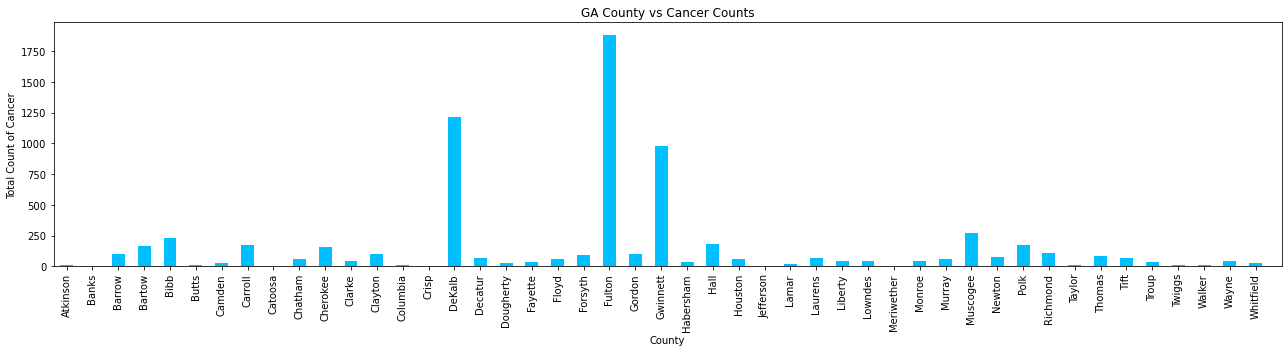

In [94]:
# Create Line chart for Total count of Lung Cancer in each county

ga_county_data = ga_data_merged1.groupby('County')

ga_cancer_sum = ga_county_data['Average Annual Count'].sum()
ga_cancer_sum

x_axis = np.arange(0, len(ga_county_data))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(18,5))
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(ga_cancer_sum)+100)

plt.xlabel("County")
plt.ylabel("Total Count of Cancer")

plt.title("GA County vs Cancer Counts")
plt.bar(x_axis, ga_cancer_sum, facecolor="deepskyblue", align="center", width=0.5)
plt.xticks(tick_locations, list(ga_cancer_sum.index), rotation="vertical")

plt.tight_layout()
plt.savefig('../GA_Data/fig4')
plt.show()


In [95]:
ga_data_merged1
#ga_data_merged1.to_csv(r'../GA_Data/ga_data_merged1.csv', index = False)

,County,FIPS,"Age-Adjusted Incidence Rate(â€ ) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (â€¡) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,CancerType,Unnamed: 0,Landfill Name,State
0,Newton,13217,22.2,18.3,26.7,24.0,stable,0,-2.6,2.7,Non-Hodgkin Lymphoma,608,Newton County Landfill,GA
1,Newton,13217,NaN,7.3,12.8,11.0,*,NaN,*,*,Liver,608,Newton County Landfill,GA
2,Newton,13217,NaN,16.3,24.6,20.0,stable,NaN,-0.5,7.7,Leukemia,608,Newton County Landfill,GA
3,Newton,13217,NaN,17.6,25.8,23.0,rising,3.3,1.2,5.4,Kidney,608,Newton County Landfill,GA
4,Bartow,13015,21.7,17.8,26.1,23.0,stable,-0.3,-3.3,2.8,Non-Hodgkin Lymphoma,560,Bartow County MSWLF,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Butts,13035,NaN,13.2,30.4,5.0,stable,NaN,-1.6,9.2,Leukemia,613,Pine Ridge Landfill,GA
175,Butts,13035,NaN,13.4,29,6.0,*,*,*,*,Kidney,613,Pine Ridge Landfill,GA
176,Meriwether,13199,NaN,12,28.7,5.0,stable,NaN,-2.1,8.8,Leukemia,625,Turkey Run Landfill,GA
177,Jefferson,13163,NaN,14.4,35.3,5.0,*,*,*,*,Kidney,599,Jefferson County CR-138 MSWL,GA


In [96]:
ga_landfill_cancer = ga_data_merged1.groupby('Landfill Name')
ga_landfill_cancer

<function matplotlib.pyplot.show(*args, **kw)>

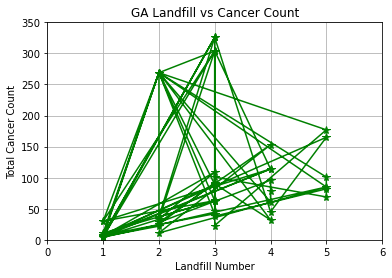

In [97]:
# Create a Line chart of Count of Landfill in GA vs Sum of Cancer cases 
ga_landfill_cancer = ga_data_merged1.groupby('Landfill Name')

ga_landfill_count = ga_landfill_cancer['Landfill Name'].count()
ga_cancer_sum = ga_landfill_cancer['Average Annual Count'].sum()

plt.plot(ga_landfill_count, ga_cancer_sum, marker="*", markersize=8, color="green")

plt.title("GA Landfill vs Cancer Count")
plt.xlabel("Landfill Number")
plt.ylabel("Total Cancer Count")

plt.xlim(0, 6)
plt.ylim(0, 350)
plt.grid()

plt.savefig("../GA_Data/fig5")
plt.show

In [98]:
# Import Landfill csv file for GA Latitude & Longitude data from GitHub

url = "https://raw.githubusercontent.com/LCHoffman/Project_1/Lindsey/landfilldata.csv"
landfill_df = pd.read_csv(url, error_bad_lines=False)
landfill_df

,Landfill ID,Landfill Name,State,Physical Address,City,County,Zip Code,Latitude,Longitude,Ownership Type,Landfill Owner Organization(s),Year Landfill Opened,Current Landfill Status
0,1994,Anchorage Regional Landfill,AK,15500 E. Eagle River Loop Road,Eagle River,Anchorage,99577,61.293281,-149.602138,Public,"Municipality of Anchorage, AK",1987.0,Open
1,11941,Capitol Disposal Landfill,AK,5600 Tonsgard Court,Juneau,Juneau,99801,58.352800,-134.494700,Private,"Waste Management, Inc.",1965.0,Open
2,12216,Central Peninsula Landfill (CPL),AK,46915 Sterling Highway,Soldotna,Kenai Peninsula,99669,60.447140,-151.103690,Public,"Kenai Peninsula Borough, AK",1969.0,Open
3,10960,Kodiak Island Borough Landfill,AK,1203 Monashka Bay Road,Kodiak,Kodiak Island,99615,57.808740,-152.407610,Public,"Kodiak Island Borough, AK",NaN,Closed
4,11020,Merrill Field Landfill,AK,800 Merrill Field Drive,Anchorage,Anchorage,99501,61.212660,-149.840120,Public,"Municipality of Anchorage, AK",1960.0,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,20722,Campbell County Landfill No.2,WY,909 Westover County Road,Gillette,Campbell,82718,44.281000,-105.512000,Public,"Campbell County, WY",1987.0,Open
2625,11100,Casper Balefill,WY,1886 N. Station Road,Evansville,Natrona,82636,42.873192,-106.283097,Public,"City of Casper, WY",1966.0,Open
2626,2196,Cheyenne Landfill,WY,1461 Happy Jack Road,Cheyenne,Laramie,82009,41.135000,-105.005000,Public,"City of Cheyenne, WY",1966.0,Open
2627,21136,Eastern Laramie County SWDD,WY,4990 CR 216,Burns,Laramie,82053,41.230852,-104.336488,Public,Eastern Laramie County Solid Waste Disposal Di...,1981.0,Open


In [99]:
# Merge Landfill dataframe and GA Landfill dataframe

ga_landfill_data_merged2 = pd.merge(ga_landfill_df, landfill_df, how='inner', on='Landfill Name')
ga_landfill_data_merged2

,Unnamed: 0,Landfill Name,State_x,County_x,Landfill ID,State_y,Physical Address,City,County_y,Zip Code,Latitude,Longitude,Ownership Type,Landfill Owner Organization(s),Year Landfill Opened,Current Landfill Status
0,556,"Advanced Disposal Services Evergreen Landfill,...",GA,Lowndes,458,GA,2995 Wetherington Lane,Valdosta,Lowndes,31601,30.808000,-83.362500,Private,Advanced Disposal Services,1992.0,Open
1,557,Athens-Clarke County Landfill,GA,Clarke,445,GA,5700 Lexington Road,Winterville,Clarke,30683,33.929000,-83.262700,Public,Unified Government of Athens-Clarke County (AC...,1977.0,Open
2,558,Atkinson County - SR 50 MSWL,GA,Atkinson,10401,GA,64 Author Davis Drive,Willacoochee,Atkinson,31650,31.319415,-82.964286,Public,"Atkinson County, GA",1997.0,Open
3,559,Baker Place Road Landfill (Ph 1 & 2),GA,Columbia,447,GA,468 Chamblin Road,Grovetown,Columbia,30813,33.489158,-82.234624,Public,"Columbia County, GA",1982.0,Closed
4,560,Bartow County MSWLF,GA,Bartow,1985,GA,40 Allatoona Dam Road\nbetween Hwy 41 & S.R. 293,Cartersville,Bartow,30120,34.143800,-84.764800,Public,"Bartow County, GA",1979.0,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,625,Turkey Run Landfill,GA,Meriwether,20699,GA,7144 Lone Oak Road,Hogansville,Meriwether,30230,33.163696,-84.848925,Private,"Waste Management, Inc.",2010.0,Open
65,628,Walker Mountain Landfill,GA,Floyd,1986,GA,433 Walker Mountain Road,Rome,Floyd,30161,34.190000,-85.214799,Public,"Floyd County, GA; Rome City",1998.0,Open
66,629,Watts Road LF,GA,Fulton,465,GA,1144 Field Road NW,Atlanta,Fulton,30318,33.785600,-84.485800,Private,"Republic Services, Inc.",1970.0,Closed
67,630,"WI Taylor County Disposal, LLC",GA,Taylor,461,GA,33 Stewart Road,Mauk,Taylor,31058,32.462263,-84.371526,Private,Waste Industries,1989.0,Open


In [100]:
# Create new dataframe for GA Landfill with Latitude & Longitude info
ga_landfill_map_data = ga_landfill_data_merged2[['Landfill Name', 'Latitude', 'Longitude', 'Ownership Type',
                                                     'Current Landfill Status']]
ga_landfill_map_data

,Landfill Name,Latitude,Longitude,Ownership Type,Current Landfill Status
0,"Advanced Disposal Services Evergreen Landfill,...",30.808000,-83.362500,Private,Open
1,Athens-Clarke County Landfill,33.929000,-83.262700,Public,Open
2,Atkinson County - SR 50 MSWL,31.319415,-82.964286,Public,Open
3,Baker Place Road Landfill (Ph 1 & 2),33.489158,-82.234624,Public,Closed
4,Bartow County MSWLF,34.143800,-84.764800,Public,Open
...,...,...,...,...,...
64,Turkey Run Landfill,33.163696,-84.848925,Private,Open
65,Walker Mountain Landfill,34.190000,-85.214799,Public,Open
66,Watts Road LF,33.785600,-84.485800,Private,Closed
67,"WI Taylor County Disposal, LLC",32.462263,-84.371526,Private,Open


In [101]:
! pip install citipy

In [102]:
# Create a map for GA Landfill

gmaps.configure(api_key=g_map_key)
ga_landfill_name = ga_landfill_map_data["Landfill Name"].tolist()
ga_landfill_status = ga_landfill_map_data["Current Landfill Status"].tolist()
marker_locations = ga_landfill_map_data[["Latitude", "Longitude"]]

fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations,
                            info_box_content=[f"Landfill Name: {name}" for name in ga_landfill_name])
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
%matplotlib inline
import scipy.stats as stats

In [105]:
ga_cancer_clean2

,County,FIPS,"Age-Adjusted Incidence Rate(â€ ) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (â€¡) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,CancerType
2,Gilmer,13123,29.3,22.1,38.2,13.0,rising,15.6,4.4,28,Non-Hodgkin Lymphoma
3,Towns,13281,29.2,15.6,49.9,5.0,*,*,*,*,Non-Hodgkin Lymphoma
4,Pickens,13227,27.4,20.4,36.1,12.0,stable,2.4,-1.7,6.6,Non-Hodgkin Lymphoma
5,Union,13291,26,18.5,36.2,11.0,stable,0.8,-3.2,5.1,Non-Hodgkin Lymphoma
6,Lumpkin,13187,25.8,18.8,34.7,10.0,stable,4.2,-0.4,9,Non-Hodgkin Lymphoma
...,...,...,...,...,...,...,...,...,...,...,...
58,Spalding,13255,NaN,13.3,22.3,13.0,stable,3.6,-0.3,7.7,Kidney
59,Camden,13039,NaN,12.3,23.8,8.0,stable,2.5,-2.9,8.2,Kidney
60,Dougherty,13095,NaN,13.8,21.5,18.0,stable,1.3,-1.1,3.7,Kidney
61,Colquitt,13071,NaN,12.5,23.3,9.0,rising,3.5,0.1,7,Kidney


In [106]:
# Create ANOVA analysis for GA data
anova_data = ga_cancer_clean2[['CancerType','Average Annual Count']]
anova_data

,CancerType,Average Annual Count
2,Non-Hodgkin Lymphoma,13.0
3,Non-Hodgkin Lymphoma,5.0
4,Non-Hodgkin Lymphoma,12.0
5,Non-Hodgkin Lymphoma,11.0
6,Non-Hodgkin Lymphoma,10.0
...,...,...
58,Kidney,13.0
59,Kidney,8.0
60,Kidney,18.0
61,Kidney,9.0


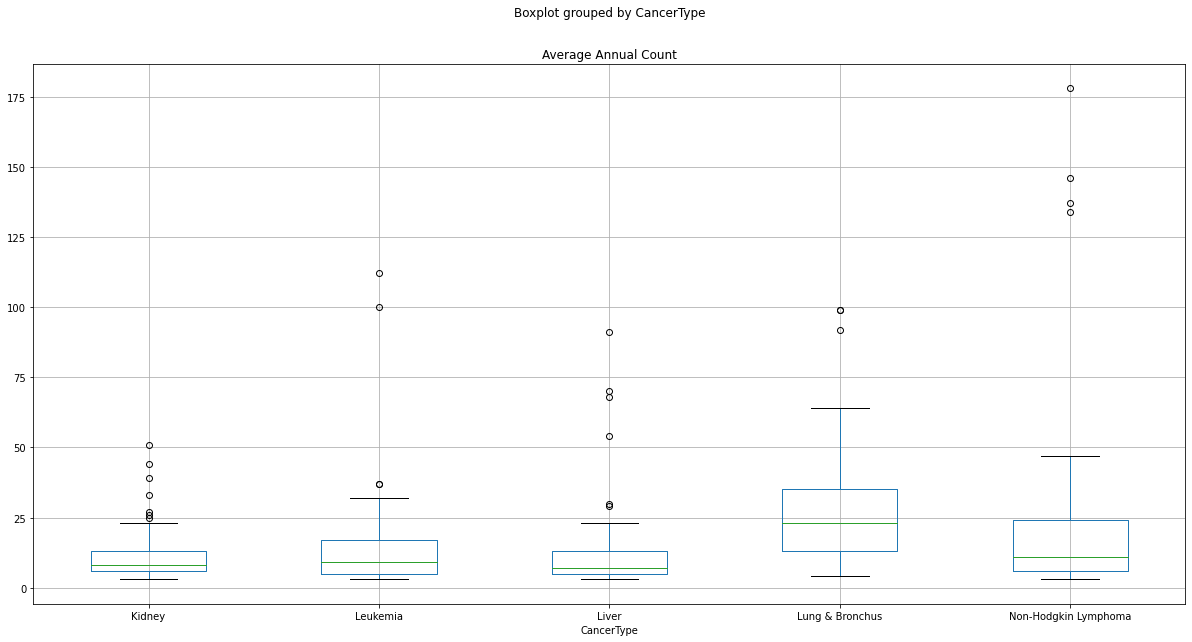

In [158]:
anova_data.boxplot("Average Annual Count", by="CancerType", figsize=(20, 10))

In [121]:
anova_data_landfill = ga_data_merged1[['Landfill Name', 'Average Annual Count']]
anova_data_landfill

,Landfill Name,Average Annual Count
0,Newton County Landfill,24.0
1,Newton County Landfill,11.0
2,Newton County Landfill,20.0
3,Newton County Landfill,23.0
4,Bartow County MSWLF,23.0
...,...,...
174,Pine Ridge Landfill,5.0
175,Pine Ridge Landfill,6.0
176,Turkey Run Landfill,5.0
177,Jefferson County CR-138 MSWL,5.0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 65 Text major ticklabel objects>)

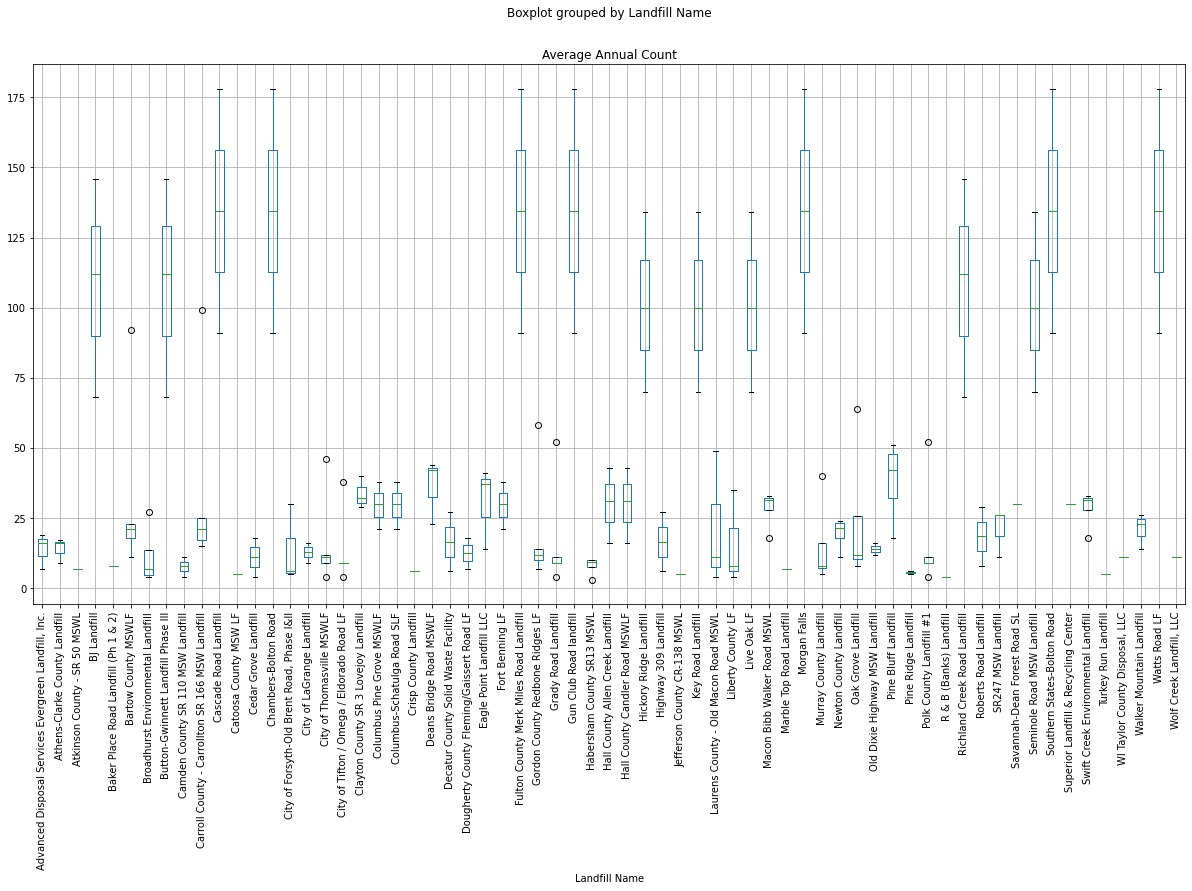

In [156]:
#anova_data_landfill.boxplot("Average Annual Count", by="Landfill Name", figsize=(20, 10))

anova_boxplot = anova_data_landfill.boxplot("Average Annual Count", by="Landfill Name", figsize=(20, 10))
plt.xticks(rotation=90)